<span style="color:blue">
Nom : Loiseau et Poliquin 
<span>

<span style="color:blue">
Matricule : 2048365 et 2075758
<span>

# TP2 : Utilisation de l’EM-31


### Instructions pour le devoir

Ce laboratoire porte sur l’acquisition et le traitement des mesures avec l’EM-31. Il est divisé en deux parties : une section théorique dans laquelle les notions importantes d’interprétation des levés EM fréquentiels sont abordées, et une partie terrain dans laquelle vous devez acquérir les données avec l’EM-31 et interpréter les résultats en fonction des levés électriques.
    
- Remplissez vos réponses dans les cellules indiquées. Les réponses peuvent prendre la forme d'un segment de code ou d'une réponses textuelle, ou les deux.
- Bien commenter les cellules de code afin de décrire la démarche.
- Assurez-vous que chaque cellule s'exécute et donne la réponse désirée avant de remettre votre notebook. Pour ce faire, il est recommandé d'exécuter Kernel -> Restart and Run All.
- Vous devez remettre les fichiers du jupyter notebook complété (.ipynb), ainsi que sa version pdf (File->Download as -> pdf).
- Ce travail doit être fait de façon individuelle, chaque personne doit remettre sa propre copie.

In [2]:
# Importation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

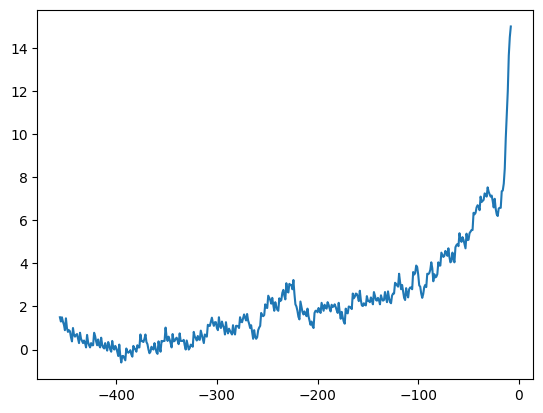

In [48]:
# open .xyz file as csv file
dataH24X90 = pd.read_csv('H24X90.csv', header=None, )

val_cond = dataH24X90[2]
pos_x = dataH24X90[0]

plt.plot(pos_x, val_cond)

## Partie 1 : Questions théoriques


### Q1 : Calcul de la résistivité apparente (2 points)
__A i)__ &nbsp; Tracez sur une même figure les fonctions de réponses cumulatives R pour les dispositifs
HCP et VCP.

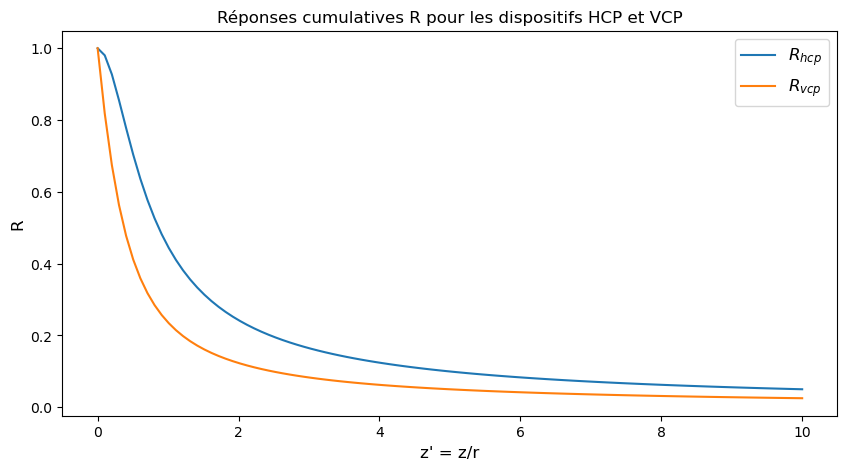

In [2]:
#Répondre ici.

zp = np.linspace(0,10,100)

Rhcp = 1/(((4*(zp**2))+1)**0.5)
Rvcp = (((4*(zp**2))+1)**0.5)-(2*zp) 

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(zp, Rhcp, label='$R_{hcp}$')
ax1.plot(zp, Rvcp, label='$R_{vcp}$')
ax1.set_xlabel('z\' = z/r', fontsize=12)
ax1.set_ylabel('R', fontsize=12)
ax1.set_title('Réponses cumulatives R pour les dispositifs HCP et VCP')
plt.legend( fontsize = 12)
plt.show()

__A ii)__ Comparer les profondeurs d’investigation des deux dispositifs.

<span style="color:red">
Réponse : Il est possible de voir que pour une même valeur de R, le dispositif HCP doit aller à une profondeur plus importante que le dispositif VCP. Donc, à des grandes profondeures, le dispositif VCP va avoir une meilleure résolution.  
</span>

<br>

__B)__ &nbsp; Pour chacun des modèles suivants, calculez la résistivité apparente que donnerait l’EM31 selon les configurations HCP et VCP. Notez que l’EM31 a une fréquence de 9,8 kHz et un espacement des bobines de 3,66 m. L’appareil est à une hauteur de 1 m du sol. 

Appelez vos variables rhoa_modeX_hcp où X est le numéro du modèle et le dernier élément est soit hcp et vcp.

<table>
<tr>
<th> <center> <font size="3">Modèle 1 </font> </center> </th>
<th> </th>
<th> <center> <font size="3">Modèle 2</font> </center> </th>
<th> </th>
<th> <center> <font size="3">Modèle 3</font> </center> </th>
</tr>
<tr>
<td>

\begin{array}{|c|c|}
\hline \large \rho \hspace{1mm} (\Omega\hspace{1mm}m) & \large h \hspace{1mm} (m) \\\hline
  \hspace{1cm} \normalsize 500 \hspace{1cm} & \hspace{1cm} \normalsize 15 \hspace{1cm} \\\hline
  \normalsize 1 & \normalsize  \\\hline
\end{array}

</td>
<td>
&nbsp; &nbsp; &nbsp; &nbsp;
</td>
<td>

\begin{array}{|c|c|}
\hline \large \rho \hspace{1mm} (\Omega\hspace{1mm}m) & \large h \hspace{1mm}  (m) \\\hline
  \hspace{1cm} \normalsize 200 \hspace{1cm} & \hspace{1cm} \normalsize 5 \hspace{1cm} \\\hline
\normalsize 50 & \normalsize 3 \\\hline
  \normalsize 600 & \\\hline
\end{array}

</td>
<td>
&nbsp; &nbsp; &nbsp; &nbsp;
</td>
<td>

\begin{array}{|c|c|}
\hline \large \rho \hspace{1mm} (\Omega\hspace{1mm}m) & \large h \hspace{1mm} (m) \\\hline
  \hspace{1cm} \normalsize 200 \hspace{1cm} & \hspace{1cm} \normalsize 5 \hspace{1cm} \\\hline
  \normalsize 50 & \normalsize 3 \\\hline
  \normalsize 100 & \\\hline
\end{array}

</td>
</tr>
</table>

In [3]:
#Répondre ici.

#HCP
def resisthcp(z): 
    Rhcp = 1/(((4*((z/3.66)**2))+1)**0.5)
    return Rhcp
    
rhoa_mod1_hcp = (((resisthcp(1)-(resisthcp(16)))/500)+resisthcp(16))**(-1)
rhoa_mod2_hcp = (((resisthcp(1)-(resisthcp(6)))/200)+((resisthcp(6)-resisthcp(9))/50)+(resisthcp(9)/600))**(-1)
rhoa_mod3_hcp = (((resisthcp(1)-(resisthcp(6)))/200)+((resisthcp(6)-resisthcp(9))/50)+(resisthcp(9)/100))**(-1)

#VCP
def resistvcp(z):
    Rvcp = (((4*((z/3.66)**2))+1)**0.5)-(2*(z/3.66))
    return Rvcp
rhoa_mod1_vcp = (((resistvcp(1)-(resistvcp(16)))/500)+resistvcp(16))**(-1)
rhoa_mod2_vcp = (((resistvcp(1)-(resistvcp(6)))/200)+((resistvcp(6)-resistvcp(9))/50)+(resistvcp(9)/600))**(-1)
rhoa_mod3_vcp = (((resistvcp(1)-(resistvcp(6)))/200)+((resistvcp(6)-resistvcp(9))/50)+(resistvcp(9)/100))**(-1)


In [4]:
print('Résistivité apparente HCP' + '\n \n'
        + 'Modèle 1: ' + str(rhoa_mod1_hcp) + ' \u03A9m \n'
        + 'Modèle 2: ' + str(rhoa_mod2_hcp) + ' \u03A9m \n'
        + 'Modèle 3: ' + str(rhoa_mod3_hcp) + ' \u03A9m \n \n')

print('Résistivité apparente VCP' + '\n \n'
        + 'Modèle 1: ' + str(rhoa_mod1_vcp) + ' \u03A9m \n'
        + 'Modèle 2: ' + str(rhoa_mod2_vcp) + ' \u03A9m \n'
        + 'Modèle 3: ' + str(rhoa_mod3_vcp) + ' \u03A9m \n \n')

Résistivité apparente HCP
 
Modèle 1: 8.683424122929408 Ωm 
Modèle 2: 195.67155486060645 Ωm 
Modèle 3: 147.68711454825402 Ωm 
 

Résistivité apparente VCP
 
Modèle 1: 17.219434998285355 Ωm 
Modèle 2: 297.866640731581 Ωm 
Modèle 3: 238.33079884955274 Ωm 
 



__C)__ &nbsp; Commentez vos résultats. En particulier, répondez aux questions suivantes:

- Est-ce que la profondeur d'investigation donnée par le fabricant semble être respectée ? 
- Expliquez les différences entre les résistivités apparentes des dispositifs HCP et VCP. 
- Comment se comparent les résistivités apparentes obtenues  aux résistivités vraies ? 
- Quel est l'effet de la troisième couche des modèles 2 et 3 ? Expliquez.
 

<span style="color:red">
Réponse : 
1) Dans le cas du deuxième et troisième modèle, la profondeur d'investigation du dispositif HCP est respectée pour la première couche et une partie de la deuxième couche puisque la profondeur limite est de 6m et la première couche fait 5m. La profondeur d'investigation n'est pas respecté dans les deux douches pour le dispositif VCP dans les deux cas. Dans le premier modèle, la profondeur d'investigation n'est pas respecté dans sa seule couche. 

2) Le dispositif HCP a des boucle parallèle à la surface du sol tandis que le dispositif VCP a des boucles perpendiculaires à la surface du sol. Ainsi, le dispositif HCP est plus sensible en profondeur comparé au dispositif VCP qui est plus sensible en surface.

3) Avec les deux dispositifs, avec les calculs de résistivité apparente, nous n'avons qu'une seule valeur par modèle. Toutefois, il y a en réalité 3 couches par modèle avec des résistivités qui diffèrent de beaucoup. Il est alors impossible d'avoir une valeur de résistivité apparente qui reflète la réalité puisqu'elle doit prendre en compte les trois couches en même temps. De plus, selon le dispositif, la valeur sera plus ou moins influencé par les couches en profondeur.

4) Pour le dispositif HCP, une partie de la deuxième couche est mesurée. La contribution directe sur la valeur de la résistivité apparente sera plus noté. À l'inverse, la couche 3 est aucunement mesurée. La contribution de cette couche sera ressentit, mais de façon moins importante. Il est possible de voir ce concept en regardant les valeur de résistivité apparente du modèle 2 et 3 du dispositif HCP. Les valeurs sont inférieures à la valeur 'vraie' dû à la résisitivité de la deuxième couche, mais elles ne sont pas égales aux valeurs de la deuxième couches dû à la contribution de la troisième couche.

    Pour le dispositif VCP, puisque la profondeur d'investigation ne respecte pas les recommendations des fabriquants pour toutes les couches, il n'y a pas de contribution directe après 3m. Les contributions indirectes des deux dernières couches sont mélangé, donnant une augmentation positive globalement. Ceci est visible en comparant les valeurs de résistivité apparente calculées qui sont nettement supérieures à la valeur 'vraie'. 

</span>

__D)__ &nbsp; Pour chacun des modèles, dire si la résistivité apparente donnée par l’appareil est valide,
en justifiant numériquement. 

In [5]:
#Répondre ici.
def alpha(sigma):
    # r = 3.66
    mu0 = 4*np.pi*1e-7
    # omega = 9.8e3
    alpha = 3.66*np.sqrt((sigma*mu0*(2*np.pi*9.8e3))/2)
    return alpha

sigma1 = 8.683424122929408**(-1) 
sigma2 = 195.67155486060645**(-1)
sigma3 = 147.68711454825402**(-1)

print('alpha résistivité apparente modèle 1 HCP:', alpha(sigma1)) 
print('alpha résistivité apparente modèle 2 HCP:', alpha(sigma2))
print('alpha résistivité apparente modèle 3 HCP:', alpha(sigma3), '\n') 

sigma4=17.219434998285355**(-1)
sigma5= 297.866640731581**(-1)
sigma6= 238.33079884955274**(-1)

print('alpha résistivité apparente modèle 1 VCP:', alpha(sigma4)) 
print('alpha résistivité apparente modèle 2 VCP:', alpha(sigma5))
print('alpha résistivité apparente modèle 3 VCP:', alpha(sigma6), '\n') 

alpha résistivité apparente modèle 1 HCP: 0.2443028226206629
alpha résistivité apparente modèle 2 HCP: 0.05146478272174041
alpha résistivité apparente modèle 3 HCP: 0.0592383139197549 

alpha résistivité apparente modèle 1 VCP: 0.1734860436019251
alpha résistivité apparente modèle 2 VCP: 0.04171219631611575
alpha résistivité apparente modèle 3 VCP: 0.0466319854986554 



<span style="color:red">
Réponse : Pour que la résisitivé apparente soit valide, il faut que alpha soit largement inférieur à 1. Toutes nos valeurs sont inférieur à 1.Ainsi, nous valeurs sont valides. 

</span>

### Q2 :  Réponse en fréquence des configurations HCP et VCP (2 points)

__A)__ &nbsp; Tracez les composantes en phase et en quadrature de la réponse des configurations HCP et
VCP pour un sol homogène. Celles-ci sont données par :

$$ \normalsize \left( \frac{H_s}{H_p} \right)_{HCP} = \frac{1}{i\alpha^2} \Big[9 - (9 + 9\sqrt{2i}\alpha + 8i\alpha^2 + (2i)^{3/2}\alpha^3) e^{-\sqrt{2i}\alpha} \Big] - 1 $$

$$ \normalsize \left( \frac{H_s}{H_p} \right)_{VCP} = 2\Big[1 - \frac{3}{2i\alpha^2} + (3 + 3\sqrt{2i}\alpha + 2i\alpha^2) \frac{e^{-\sqrt{2i}\alpha}}{2i\alpha^2} \Big] - 1 $$

avec :

$$ \alpha = \frac{r}{\delta} = r \sqrt{\frac{\sigma \mu_0 \omega}{2}} $$


Identifiez sur ce graphique les limites résistives et inductives. Voici quelques fonctions utiles pour vous aider:

- `np.real` et `np.imag` donnent les parties réelles et imaginaires 
- Le nombre imaginaire s'écrit comme `1j` en python
- La fonction `ax.text(x, y, 'texte', fontsize=14)` permet d'ajouter un commentaire à l'axe `ax` à la position x, y
- La fonction `rect = patches.Rectangle( (x,y), largeur, hauteur, facecolor='none')` (qui a été importée au début du notebook) permet d'ajouter des rectangles à une figure. Pour ajouter le rectangle `rect` ainsi créé à un axe, vous devez ensuite appeler `ax.add_patch(rect)`.

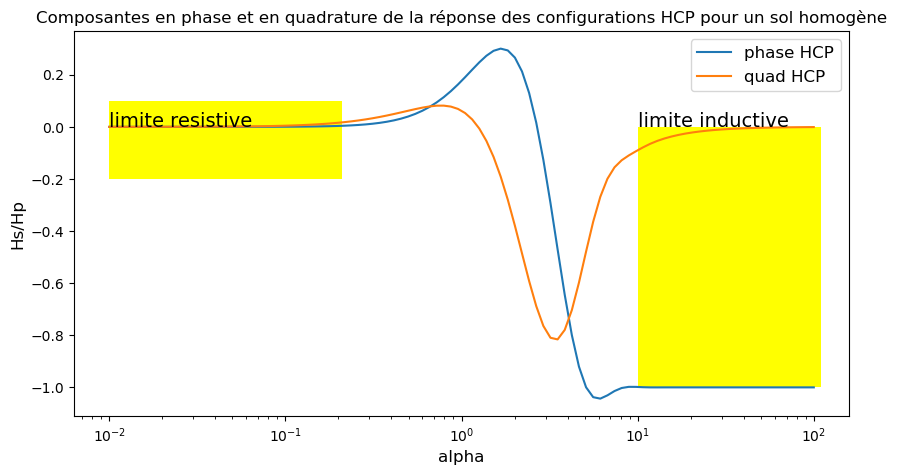

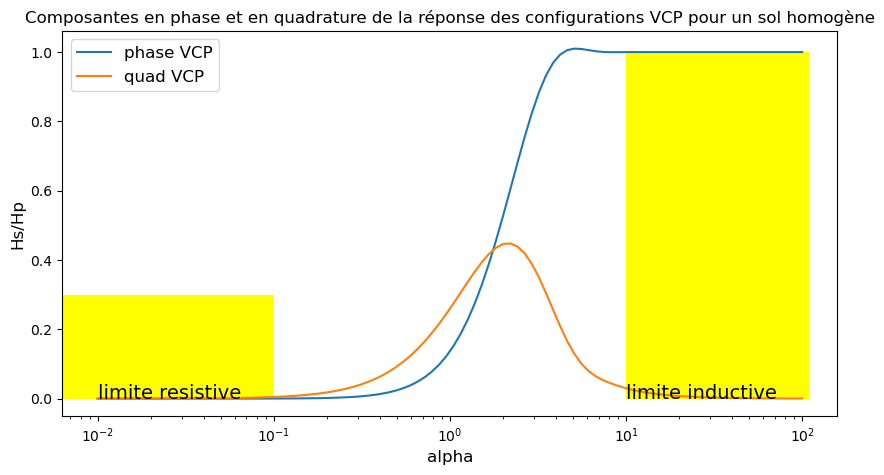

In [6]:
#Répondre ici.

def HHhcp(alpha): 
    partie1 = (1/(1j*alpha**2))
    partie2 = (9+9*np.sqrt(2*1j)*alpha+8*1j*(alpha**2)+((2*1j)**(3/2))*(alpha**3))*np.exp(-np.sqrt(2*1j)*alpha)
    result = partie1*(9-partie2)-1
    return result
    
def HHvcp(alpha): 
    partie1 = (3+(3*np.sqrt(2*1j)*alpha+2*1j*alpha**2))*(np.exp(alpha*-np.sqrt(2*1j))/(2*1j*alpha**2))
    result2 = 2*(1-(3/(2*1j*alpha**2))+partie1)-1
    return result2

alpha = np.logspace(-2,2,100)

fig2, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(alpha, np.real(HHhcp(alpha)), label='phase HCP')
ax1.plot(alpha, np.imag(HHhcp(alpha)), label='quad HCP')
ax1.set_xscale('log')
ax1.set_xlabel('alpha', fontsize=12)
ax1.set_ylabel('Hs/Hp', fontsize=12)
ax1.text(10e-3, 0, 'limite resistive', fontsize=14)
rect = patches.Rectangle( (10e-3, -0.2), 0.2, 0.3, facecolor='yellow')
ax1.add_patch(rect)
ax1.text(10e0, 0, 'limite inductive', fontsize=14)
rect2 = patches.Rectangle( (10e0, -1), 100, 1, facecolor='yellow')
ax1.add_patch(rect2)
ax1.set_title('Composantes en phase et en quadrature de la réponse des configurations HCP pour un sol homogène')
plt.legend( fontsize = 12)


fig3,ax1 = plt.subplots(figsize=(10,5))
ax1.plot(alpha, np.real(HHvcp(alpha)), label='phase VCP')
ax1.plot(alpha, np.imag(HHvcp(alpha)), label='quad VCP')
ax1.set_xscale('log')
ax1.set_xlabel('alpha', fontsize=12)
ax1.set_ylabel('Hs/Hp', fontsize=12)
ax1.text(10e-3, 0, 'limite resistive', fontsize=14)
rect = patches.Rectangle( (0, 0), 0.1, 0.3, facecolor='yellow')
ax1.add_patch(rect)
ax1.text(10e0, 0, 'limite inductive', fontsize=14)
rect2 = patches.Rectangle( (10e0, 0), 100, 1, facecolor='yellow')
ax1.add_patch(rect2)
ax1.set_title('Composantes en phase et en quadrature de la réponse des configurations VCP pour un sol homogène')
plt.legend(fontsize = 12)
plt.show()

__B)__ &nbsp; __1.__ Tracez les composantes en phases et en quadratures des deux configurations en fonction de la conductivité, pour une fréquence de 9,8 kHz et un espacement des bobines de 3,66 m dans la limite résistive.

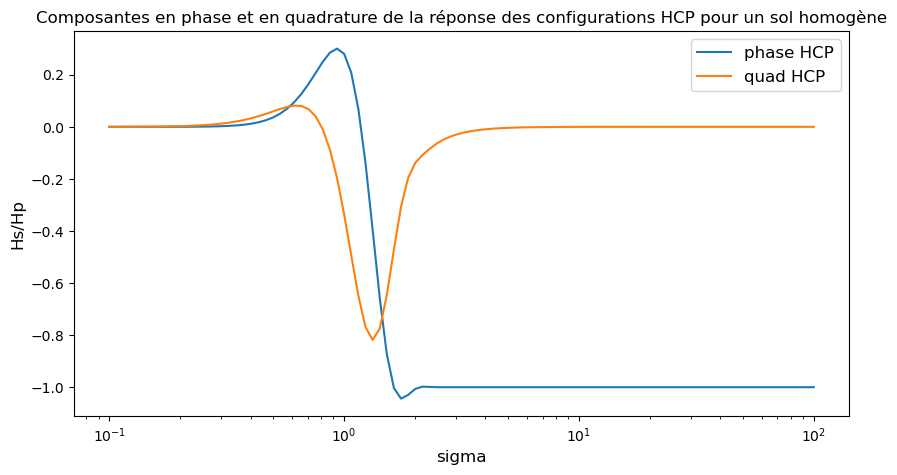

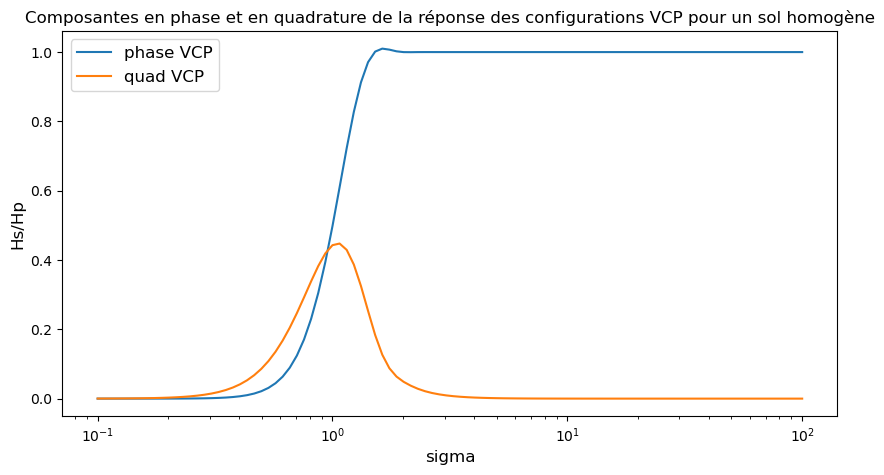

In [7]:
#Répondre ici.
def sigma(alpha):
    mu0 = 4*np.pi*1e-7
    sigma = (2*alpha**2)/(mu0*2*np.pi*9.8e3*(3.66**2))
    return sigma

def HHhcpsig(alpha): 
    partie1 = (1/(1j*sigma(alpha)**2))
    partie2 = (9+9*np.sqrt(2*1j)*sigma(alpha)+8*1j*(sigma(alpha)**2)+((2*1j)**(3/2))*(sigma(alpha)**3))*np.exp(-np.sqrt(2*1j)*sigma(alpha))
    result = partie1*(9-partie2)-1
    return result
    
def HHvcpsig(alpha): 
    partie1 = (3+(3*np.sqrt(2*1j)*sigma(alpha)+2*1j*sigma(alpha)**2))*(np.exp(sigma(alpha)*-np.sqrt(2*1j))/(2*1j*sigma(alpha)**2))
    result2 = 2*(1-(3/(2*1j*sigma(alpha)**2))+partie1)-1
    return result2

alpha = np.logspace(-1,2,100)

fig2, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(alpha, np.real(HHhcpsig(alpha)), label='phase HCP')
ax1.plot(alpha, np.imag(HHhcpsig(alpha)), label='quad HCP')
ax1.set_xscale('log')
ax1.set_xlabel('sigma', fontsize=12)
ax1.set_ylabel('Hs/Hp', fontsize=12)
ax1.set_title('Composantes en phase et en quadrature de la réponse des configurations HCP pour un sol homogène')
plt.legend( fontsize = 12)

fig3,ax1 = plt.subplots(figsize=(10,5))
ax1.plot(alpha, np.real(HHvcpsig(alpha)), label='phase VCP')
ax1.plot(alpha, np.imag(HHvcpsig(alpha)), label='quad VCP')
ax1.set_xscale('log')
ax1.set_xlabel('sigma', fontsize=12)
ax1.set_ylabel('Hs/Hp', fontsize=12)
ax1.set_title('Composantes en phase et en quadrature de la réponse des configurations VCP pour un sol homogène')
plt.legend( fontsize = 12)
plt.show()

__2.__ Comment pouvez-vous identifier la limite résistive graphiquement ? 

<span style="color:red">
Réponse : Les limites se trouvent là où les courbes deviennent constantes. La limite résistive se trouve là où la conductivité est la plus faible, donc dans la section gauche du graphique et, inversement, la limite inductive se trouve dans la section droite du graphique. 

</span>

__C)__ &nbsp; __1.__ Tracez le signal du champ primaire et du champ secondaire en fonction du temps pour les mêmes paramètres qu’en B), pour la configuration HCP et une conductivité de 0.05 S/m. Mettre sur le même graphique les champs primaires et secondaires et identifier le déphasage entre ces deux champs. Normalisez l’amplitude des deux signaux (amplitude=1).

Pour ajouter une flèche à un graphique, utilisez la fonction `ax.annotate("", xy=(x0, y0), xytext=(x1,y1), arrowprops=dict(facecolor='black', arrowstyle="<->"))` où `x0`, `y0` et `x1`, `y1` sont les positions du début et de la fin de la flèche, respectivement.

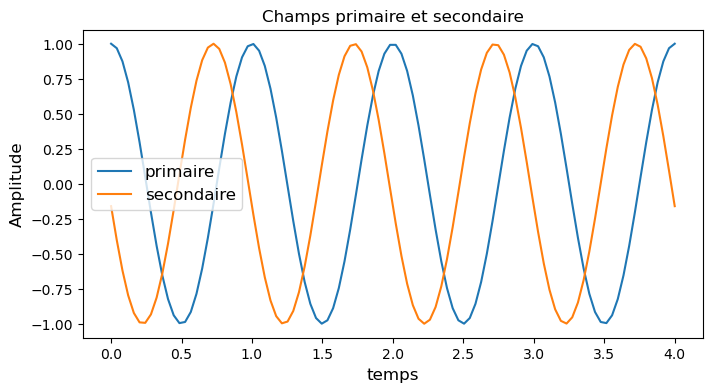

In [15]:
#Répondre ici.

def alpha(sigma):
    mu0 = 4*np.pi*1e-7
    alpha = 3.66*np.sqrt((sigma*mu0*(2*np.pi*9.8e3))/2)
    return alpha

def phi(alpha): 
    phi = np.arctan(alpha)
    return alpha

def primaire(t): 
    Ep = np.cos((2*np.pi*9.8e7)*t)
    return Ep

def secondaire(t, sigma):
    alph = alpha(sigma)
    phii = phi(alph)
    Es = np.cos((2*np.pi*9.8e3)*t-(np.pi/2)-phii)
    return Es

temps = np.linspace(0,4,100)

fig6, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(temps, primaire(temps), label='primaire')
ax1.plot(temps, secondaire(temps, 0.05), label='secondaire')
ax1.set_xlabel('temps', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Champs primaire et secondaire')
plt.legend( fontsize = 12)

<br>

__2.__ Quel est le rapport des amplitudes des champs primaires et secondaires ? 

In [29]:
#Répondre ici.

def alpha(sigma):
    mu0 = 4*np.pi*1e-7
    alpha = 3.66*np.sqrt((sigma*mu0*(2*np.pi*9.8e3))/2)
    return alpha

def phi(alpha): 
    phi = np.arctan(alpha)
    return alpha
    
rapport = phi(alpha(0.05))
print(rapport)

0.160975207569941


Dans cette situation, le rapport est le déphasage entre les deux courbes, ce qui correspond à phi. 

<br>

__D)__ &nbsp; __1.__  À l’aide des formules vues en cours, tracez la conductivité apparente pour la configuration HCP en fonction de la conductivité pour un espacement de 3.66 m et 4 fréquences différentes : 100 Hz, 9,8 kHz, 80 kHz, et 2MHz. 

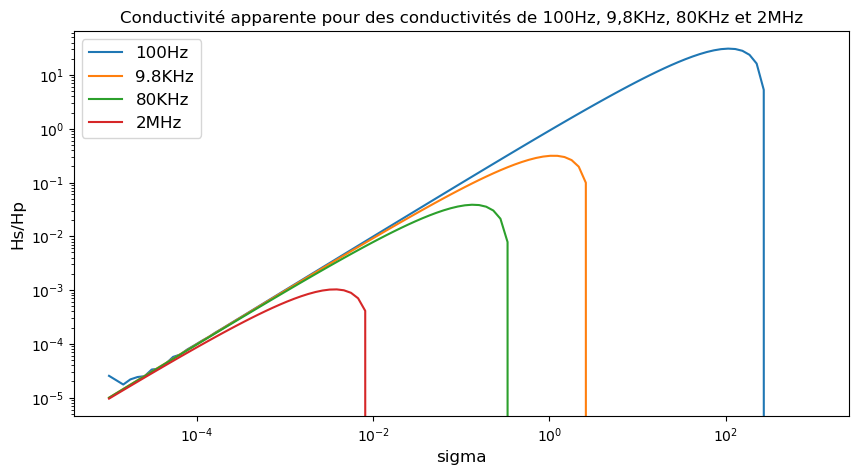

In [10]:
#Répondre ici.

omega1 = 2*np.pi*100
omega2 = 2*np.pi*9.8e3
omega3 = 2*np.pi*80e3
omega4 = 2*np.pi*3e6

def alpha(sigma, omega):
    mu0 = 4*np.pi*1e-7
    alpha = 3.66*np.sqrt((sigma*mu0*omega)/2)
    return alpha

def HHhcp(sigma, omega): 
    partie1 = (1/(1j*alpha(sigma, omega)**2))
    partie2 = (9+9*np.sqrt(2*1j)*alpha(sigma, omega)+8*1j*(alpha(sigma, omega)**2)+((2*1j)**(3/2))*(alpha(sigma, omega)**3))*np.exp(-np.sqrt(2*1j)*alpha(sigma, omega))
    result = partie1*(9-partie2)-1
    return result

def cond_app(sigma, omega): 
    mu0 = 4*np.pi*1e-7
    Q = np.imag(HHhcp(sigma, omega))
    cond_app = (4*Q)/(mu0*(omega)*3.66**2)
    return cond_app

sigma = np.logspace(-5,3,100)

fig8, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(sigma, cond_app(sigma, omega1), label='100Hz')
ax1.plot(sigma, cond_app(sigma, omega2), label='9.8KHz')
ax1.plot(sigma, cond_app(sigma, omega3), label='80KHz')
ax1.plot(sigma, cond_app(sigma, omega4), label='2MHz')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('sigma', fontsize=12)
ax1.set_ylabel('Hs/Hp', fontsize=12)
ax1.set_title('Conductivité apparente pour des conductivités de 100Hz, 9,8KHz, 80KHz et 2MHz')
plt.legend( fontsize = 12)

__2.__ Discuter de la validité de la résistivité apparente pour ces différents cas.

<span style="color:red">
Réponse : Il est possible de voir que la forme des quatre courbes est très similaire. De plus, pour les petites valeurs de conductivité, les quatre courbes sont superposées. Les courbes commencent à dévier lorsque les mesures de conductivité apparente ne sont plus valide avec le dispositif HCP.  

</span>

### Q3 Variations le long d’un profil (1 points)

Soit le modèle du sol à trois boucles vu en classe, dont le rapport du champ primaire au
champ secondaire est donné par :

$$ \large \frac{\epsilon_s}{\epsilon_p} = -\frac{M_{01} M_{12}}{M_{02} L} \frac{i\alpha}{1 + i\alpha} $$

Vous étudierez une configuration HCP au-dessus d’une plaque mince horizontale,
assimilable à une boucle horizontale : 

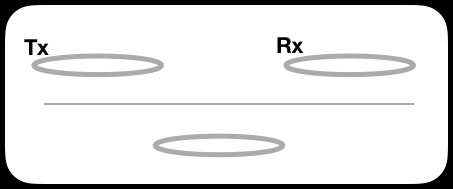

<br>

__A)__ &nbsp; On vous demande de tracer le profil selon x des composantes en phase et en quadrature pour 3 nombres d’induction : 0.01, 5, et 250. Normalisez en fonction de la surface des boucles et de l’inductance L, c'est-à-dire L=1 et S=1. La profondeur de la boucle est de 10 m et la distance entre les boucles est de 5 m. 
<br>
<br>
__Indice :__ Utilisez l’expression pour un champ dipolaire afin d’obtenir les inductances
mutuelles entre les 3 boucles. 

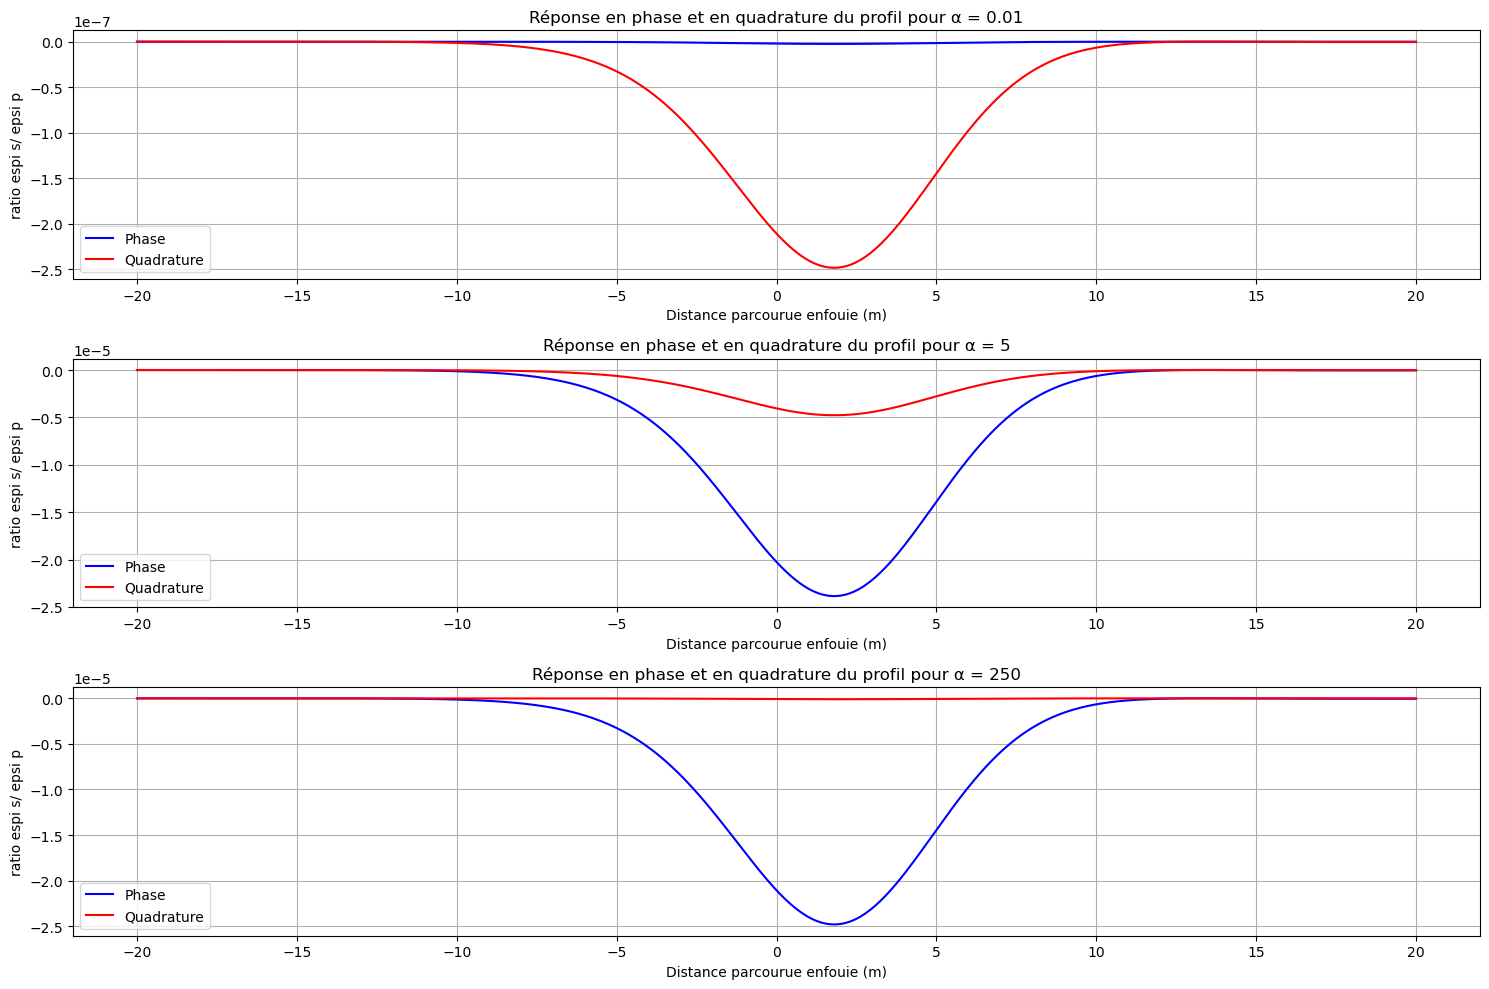

In [12]:
#Répondre ici.
#Code issu de ChatGPT
# Paramètres
L = 1 
S = 1  
z = 10  
r02 = 5  

# Nombres d'induction ou alpha
nb_alpha = [0.01, 5, 250]

def calculate_components(x, alpha, r02):
    d = r02  
    r01 = np.sqrt(x**2 + z**2)
    r12 = np.sqrt((x - r02)**2 + z**2)
    
    beta = alpha / z
    M01 = (S / (4 * np.pi * r01**3)) * ((3*x**2 / r01**2) - 2)
    M12 = (S / (4 * np.pi * r12**3)) * ((3*(x - d/2)**2 / r12**2) - 2)
    M02 = (S / (4 * np.pi * r02**3)) * ((3*(-d/2)**2 / r02**2) - 2)
    
    H1 = (M01 * M12 / (M02 * L)) * (1j * alpha / (1 + 1j * alpha))

    return H1

# Génération de la plage de valeurs pour x
x = np.linspace(-20, 20, 500)

# Tracé des graphiques pour chaque alpha
plt.figure(figsize=(15, 10))

for i, alpha in enumerate(nb_alpha, start=1):
    plt.subplot(3, 1, i)
    
    H1 = calculate_components(x, alpha, r02)
    
    # Tracé des parties en phase et en quadrature de Hx1
    plt.plot(x, H1.real, label='Phase', color='blue')
    plt.plot(x, H1.imag, label='Quadrature', color='red')
    
    plt.title(f'Réponse en phase et en quadrature du profil pour α = {alpha}')
    plt.xlabel('Distance parcourue enfouie (m)')
    plt.ylabel('ratio espi s/ epsi p')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



__B)__ Comment se manifeste la présence d’un très bon conducteur sur un profil avec le
dispositif HCP ?

<span style="color:red">
Réponse : Ces trois graphiques permettent d'illustrer le proportionalité entre le nombre d'induction alpha et le ration les champs primaire et secondaire. En effet, plus le nombre d'induction est grand, plus le conducteur se rapproche du comportement d'un conducteur parfait. Un conducteur parfait se manifeste uniquement par une composante en phase (la composante en quadrature est nul). Ce comportement est observé dans le troisième graphique (alpha = 120). C'est l'inverse pour les petites valeurs de nombre d'induction, avec la réponse dominée par la composante en quadrature. Ce comportement est illustré dans le premier graphique. Le deuxième graphique, avec un nombre d'induction de 5, illustre le cas où le conducteur est un entre-deux. 

</span>

## Partie 2 : Section expérimentale

## Introduction (Mise en contexte)

<p style="line-height:1.7 ; text-align: justify ">
Suite aux mesures de tomographie de résistivité électrique sur l’ancienne piste de ski du Mont Royal, vous voulez confirmer votre interprétation. En particulier, vous aimeriez savoir si l’anomalie conductrice au centre du levé pourrait être causée par un objet métallique enfoui. Vous avez justement à portée de main un appareil EM-31. Vous proposez ainsi de procéder à un levé FEM sur le même tracé de la ligne de résistivité électrique.  </p>


### Étape 1: Formulation du problème (0,5 points)

Quels sont les objectifs du levé géophysique ?

<span style="color:red">
Réponse: En géophysique d'investigation, il est souvent nécessaire d'utiliser plus d'une méthode pour confirmer les interprétations. C'est le cas dans cette situation suite au levé de tomographie électrique. Nous voulons confirmer ou infirmer les observations du levé de tomographie électrique, ce qui correspond entre autre à confirmer la position et la nature de l'anomalie détectée. 
</span>

### Étape 2: Choix des propriétés géophysiques (0,5 points)

Justifiez le choix d'une méthode sensible aux changements de résistivité électrique afin d'atteindre les objectifs du levé.

<span style="color:red">
Réponse: Puisque le corps que nous avons observé dans l'inversion du TP1 est métallique et faiblement résistif, il y aura un grand contraste de résistivité électrique entre celui-ci et le roc, dans le cas du Mont-Royal un gabbro avec une grande résistivité électrique. Une méthode sensible aux changements de résistivité électrique sera donc capable de mesurer ces contrastes et imager le corps enfoui. 
</span>

### Étape 3: Choix de la méthode géophysique (0,5 points)

Justiez votre choise d'un levé EM-31. En particulier, en quoi cette méthode permettra de lever les incertitudes du levé de tomographie électrique ?

<span style="color:red">
Réponse: Les levés EM-31 ne détectent que les corps dans lesquels il est possible d'induire un courant électrique.  Inversement, avec les levés de tomographie électrique, il est possible de détecter n'importe quel corp enfoui, couche stratigraphique ou autre qui a un certain contraste de résistivité. Le levé EM-31 sera donc utile pour confirmer l'emplacement du corps détecteé avec la tomographie électrique ou même de retrouver des vestiges qui n'ont pas été détectés la première fois. 
</span>

### Étape 4: Acquisition des données (1 points)

Vous devez acquérir vos propres données sur le terrain. Remplissez la feuille de terrain fournie en annexe.

### Étape 5 Traitement des données (1 points)

Dans cette section, vous aurez à traiter et interpréter les données de l’EM31 acquises sur le terrain en 2018. On vous demande ainsi de :

Mettre en graphique les composantes en phase et la conductivité apparente des dispositifs VCP et HCP, pour les données de 2018. 

In [13]:
Data2018 = pd.read_csv('data-EM31-ETE2018.csv', delimiter=";")

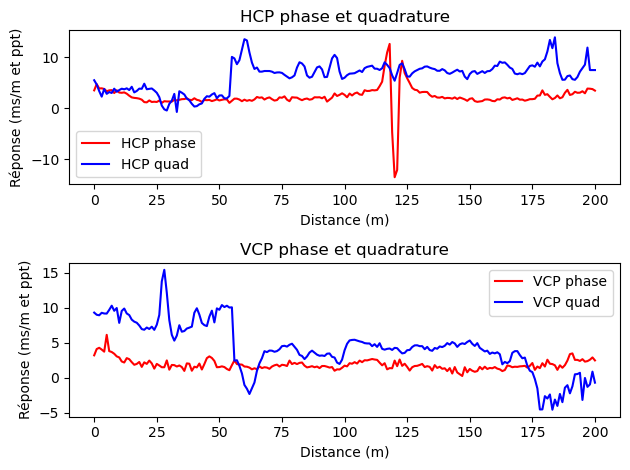

In [14]:
# Répondre ici

x = Data2018['X']
y1 = Data2018['HCP']
y2 = Data2018['VCP']
y3 = Data2018['HCP.1']
y4 = Data2018['VCP.1']

plt.subplot(2, 1, 1)
plt.plot(x, y1, label='HCP phase', color='red')
plt.plot(x, y3, label='HCP quad', color='blue')
plt.xlabel('Distance (m)')
plt.ylabel('Réponse (ms/m et ppt)')
plt.title('HCP phase et quadrature')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, y2, label='VCP phase', color='red')
plt.plot(x, y4, label='VCP quad', color='blue')
plt.xlabel('Distance (m)')
plt.ylabel('Réponse (ms/m et ppt)')
plt.title('VCP phase et quadrature')
plt.legend()

plt.tight_layout()
plt.show()

### Étape 6 Interprétation des résultats (1 points)

Interprétez les anomalies observés sur le levé de EM-31, conjointement au levé de tomographie électrique. Discutez de pourquoi les levés HCP et VCP sont différents.

<span style="color:red">
Réponse : En observant le graphique de la conposante horizontale du levé de EM-31 (EM-31), il est possible d'observer qu'il y a une anomalie négative à une distance d'environ 120m. Cette anomalie correspond à celle observée lors du levé de tomographie électrique. La forme arrondie plus allongée vers le bas correspond aussi aux observations du levé de tomographie électrique. Cette anomalie est observable dans la composante en phase. Ainsi, il est possible de conclure que le corps enfoui à cette endroit est métallique.Toutefois, il est aussi possible de voir qu'il un petit pic dans la courbe de la composante en quadrature. Il y a donc la possiblité qu'un autre corps enfoui à proximité ou un problème de qualibration qui cause un déphasage. 
Il est important de noter que l'anomalie n'a pas été détecté avec le dispositif VCP. Dû au fait que le dispositif VCP utilise des boucles verticales permettant de mesurer la composante horizontale, il est alors possible de conclure que l'anomalie est en effet plus allongé verticalement. 


</span>

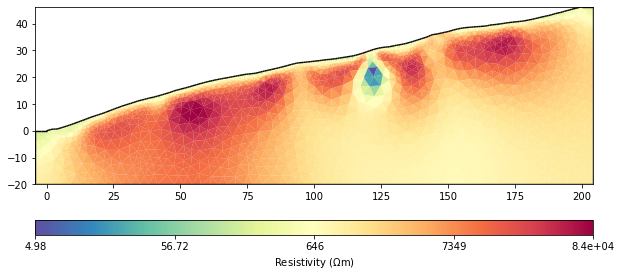

### Étape 7 Synthèse (0.5 points)

Faites un retour sur les objectifs du levé. Ont-ils été atteint ? Quels sont les éléments qui demeurent encore incertain. Avez-vous des propositions pour des travaux futurs qui permettraient de valider vos résultats ?

<span style="color:red">
Réponse : Les mesures, les calculs et les graphiques effectués ont permis d'atteindre l'objectif principale qui était de confirmer la présence et la nature d'anomalies sur le site étudié. Nous avons réussi à confirmer l'emplacement d'un corps corps enfoui observé lors du levé de tomographie électrique. Toutefois, la nature de l'anomalie est encore incertain puisqu'il y a une composante en quadrature présente. Il faudrait faire plus d'investigations pour vérifier la présence de matériaux pouvant causer ce déphasage. De plus, même les mesures permettent de conclure que le corps enfoui est plus allongé verticalement, il n'est pas possible de déterminer avec certitude ses dimentions. Cet aspect requierait aussi plus d'investigations. 

</span>